In [3]:
import pandas as pd
from google.colab import files
import io

# Upload the dataset
uploaded = files.upload()
filename = list(uploaded.keys())[0]

# Read the CSV, skipping lines with errors
df = pd.read_csv(io.BytesIO(uploaded[filename]), on_bad_lines='skip')
print("Dataset loaded. Here are the first few rows:")
df.head()


Saving market_analysis.csv to market_analysis (1).csv
Dataset loaded. Here are the first few rows:


,,,unified_id;month;zipcode;city;host_type;bedrooms;bathrooms;guests;revenue;openness;occupancy;nightly rate;lead time;length stay
10000347;2020-1;92315;Big Bear Lake;2-5 Units;3;2;10;899,9599915;31;0,064516129;449,9799957;52;3
10000347;2020-10;92315;Big Bear Lake;2-5 Units;3;2;10;13950;31;1;450;;,NaN,NaN,NaN
10000347;2020-11;92315;Big Bear Lake;2-5 Units;3;2;10;13500;30;1;450;;,NaN,NaN,NaN
10000347;2020-12;92315;Big Bear Lake;2-5 Units;3;2;10;13950;31;1;450;;,NaN,NaN,NaN
10000347;2020-2;92315;Big Bear Lake;2-5 Units;3;2;10;450;29;0,034482759;450;8;1,NaN,NaN


In [4]:
df = pd.read_csv(io.BytesIO(uploaded[filename]), on_bad_lines='skip', sep=',', quotechar='"')


In [5]:
# ============================
# Step 3: Initial Data Inspection
# ============================
print("Data Info:")
df.info()

print("Data Description:")
display(df.describe())

Data Info:
<class 'pandas.core.frame.DataFrame'>
MultiIndex: 78322 entries, ('10000347;2020-1;92315;Big Bear Lake;2-5 Units;3;2;10;899', '9599915;31;0', '064516129;449') to ('9996370;2022-9;92314;Big Bear City;Single Owners;3;1;8;0;30;0;;;', nan, nan)
Data columns (total 1 columns):
 #   Column                                                                                                                           Non-Null Count  Dtype 
---  ------                                                                                                                           --------------  ----- 
 0   unified_id;month;zipcode;city;host_type;bedrooms;bathrooms;guests;revenue;openness;occupancy;nightly rate;lead time;length stay  25125 non-null  object
dtypes: object(1)
memory usage: 5.9+ MB
Data Description:


,unified_id;month;zipcode;city;host_type;bedrooms;bathrooms;guests;revenue;openness;occupancy;nightly rate;lead time;length stay
count,25125
unique,688
top,5
freq,3614


In [7]:
# Step 2: Read the file as text and split into lines
content = io.StringIO(uploaded[filename].decode('utf-8')).read()
lines = content.splitlines()
print("Total lines loaded:", len(lines))

# Step 3: Extract header and determine the expected number of columns
header = [col.strip() for col in lines[0].split(';')]
print("Header columns:", header)
expected_num_columns = len(header)

# Step 4: Process each line and clean the data
cleaned_rows = []
for i, line in enumerate(lines[1:], start=2):  # start=2 to reflect the actual line number in the file
    # Split by semicolon
    fields = line.split(';')
    # Remove tabs and extra whitespace from each field
    fields = [field.replace('\t', '').strip() for field in fields]

    # Check if the number of fields matches the header
    if len(fields) != expected_num_columns:
        print(f"Skipping line {i} due to unexpected number of fields: {len(fields)} (expected {expected_num_columns}).")
        continue

    cleaned_rows.append(fields)

# Step 5: Create a DataFrame from the cleaned rows
df_clean = pd.DataFrame(cleaned_rows, columns=header)
print("Cleaned DataFrame shape:", df_clean.shape)
display(df_clean.head())

# Step 6: Convert appropriate columns to numeric data types
# Adjust the list below based on which columns should be numeric
numeric_cols = ['bedrooms', 'bathrooms', 'guests', 'revenue', 'openness', 'occupancy', 'nightly rate', 'lead time', 'length stay']
for col in numeric_cols:
    if col in df_clean.columns:
        df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')

# Step 7: Check for missing values after cleaning
print("Missing values per column:")
print(df_clean.isnull().sum())

Total lines loaded: 116620
Header columns: ['\ufeffunified_id', 'month', 'zipcode', 'city', 'host_type', 'bedrooms', 'bathrooms', 'guests', 'revenue', 'openness', 'occupancy', 'nightly rate', 'lead time', 'length stay']
Cleaned DataFrame shape: (116619, 14)


,﻿unified_id,month,zipcode,city,host_type,bedrooms,bathrooms,guests,revenue,openness,occupancy,nightly rate,lead time,length stay
0,10000347,2020-1,92315,Big Bear Lake,2-5 Units,3,2,10,"899,9599915",31,"0,064516129","449,9799957",52,3
1,10000347,2020-10,92315,Big Bear Lake,2-5 Units,3,2,10,13950,31,1,450,,
2,10000347,2020-11,92315,Big Bear Lake,2-5 Units,3,2,10,13500,30,1,450,,
3,10000347,2020-12,92315,Big Bear Lake,2-5 Units,3,2,10,13950,31,1,450,,
4,10000347,2020-2,92315,Big Bear Lake,2-5 Units,3,2,10,450,29,"0,034482759",450,8,1


Missing values per column:
﻿unified_id         0
month               0
zipcode             0
city                0
host_type           0
bedrooms            0
bathrooms           0
guests           6024
revenue          1457
openness            0
occupancy       81864
nightly rate    93220
lead time       88708
length stay     88211
dtype: int64


In [9]:
import numpy as np
import pandas as pd

# Define a helper function to convert numeric strings
def convert_numeric(x):
    if pd.isnull(x):
        return np.nan
    # Ensure we are dealing with a string and remove extra whitespace
    x = str(x).strip()
    if x == '':
        return np.nan
    # If the value contains a comma:
    # - If there's also a dot, assume comma is a thousands separator and remove it.
    # - If no dot exists, assume the comma is a decimal separator and replace it with a dot.
    if ',' in x:
        if '.' in x:
            x = x.replace(',', '')
        else:
            x = x.replace(',', '.')
    try:
        return float(x)
    except Exception as e:
        # Return NaN if conversion fails
        return np.nan

# List of numeric columns based on your header
numeric_cols = ['bedrooms', 'bathrooms', 'guests', 'revenue', 'openness',
                'occupancy', 'nightly rate', 'lead time', 'length stay']

# Apply the conversion function to each numeric column
for col in numeric_cols:
    if col in df_clean.columns:
        df_clean[col] = df_clean[col].apply(convert_numeric)

# Check missing values after conversion
print("Missing values per numeric column after conversion:")
print(df_clean[numeric_cols].isnull().sum())

# Optionally, fill missing values with the median of each numeric column
for col in numeric_cols:
    median_val = df_clean[col].median()
    df_clean[col] = df_clean[col].fillna(median_val)
    print(f"Filled missing values in '{col}' with median: {median_val}")

# Display the first few rows of the cleaned DataFrame
print("Cleaned DataFrame (numeric columns) head:")
display(df_clean.head())


Missing values per numeric column after conversion:
bedrooms        0
bathrooms       0
guests          0
revenue         0
openness        0
occupancy       0
nightly rate    0
lead time       0
length stay     0
dtype: int64
Filled missing values in 'bedrooms' with median: 3.0
Filled missing values in 'bathrooms' with median: 2.0
Filled missing values in 'guests' with median: 8.0
Filled missing values in 'revenue' with median: 3775.0
Filled missing values in 'openness' with median: 30.0
Filled missing values in 'occupancy' with median: 0.0
Filled missing values in 'nightly rate' with median: 339.0
Filled missing values in 'lead time' with median: 19.0
Filled missing values in 'length stay' with median: 3.0
Cleaned DataFrame (numeric columns) head:


,﻿unified_id,month,zipcode,city,host_type,bedrooms,bathrooms,guests,revenue,openness,occupancy,nightly rate,lead time,length stay
0,10000347,2020-1,92315,Big Bear Lake,2-5 Units,3.0,2.0,10.0,3775.0,31.0,0.0,339.0,52.0,3.0
1,10000347,2020-10,92315,Big Bear Lake,2-5 Units,3.0,2.0,10.0,13950.0,31.0,1.0,450.0,19.0,3.0
2,10000347,2020-11,92315,Big Bear Lake,2-5 Units,3.0,2.0,10.0,13500.0,30.0,1.0,450.0,19.0,3.0
3,10000347,2020-12,92315,Big Bear Lake,2-5 Units,3.0,2.0,10.0,13950.0,31.0,1.0,450.0,19.0,3.0
4,10000347,2020-2,92315,Big Bear Lake,2-5 Units,3.0,2.0,10.0,450.0,29.0,0.0,450.0,8.0,1.0


Summary Statistics for Numeric Variables:
            bedrooms      bathrooms         guests        revenue  \
count  116619.000000  116619.000000  116619.000000  116619.000000   
mean        3.401538       2.402619       8.408450    5700.420326   
std         0.633803       0.794012       2.142286    7234.373734   
min         3.000000       0.000000       2.000000       0.000000   
25%         3.000000       2.000000       7.000000     798.000000   
50%         3.000000       2.000000       8.000000    3775.000000   
75%         4.000000       3.000000      10.000000    7893.000000   
max         5.000000       7.000000      14.000000  151900.000000   

            openness      occupancy   nightly rate      lead time  \
count  116619.000000  116619.000000  116619.000000  116619.000000   
mean       28.334217       0.096948     360.329114      23.344644   
std         6.164065       0.295888     180.094149      27.078539   
min         1.000000       0.000000      10.000000       1.0

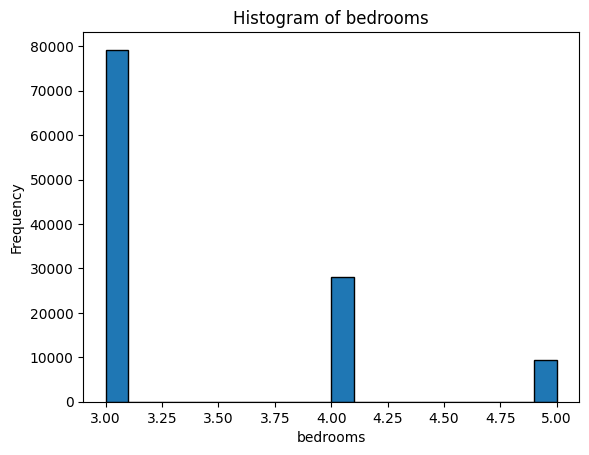

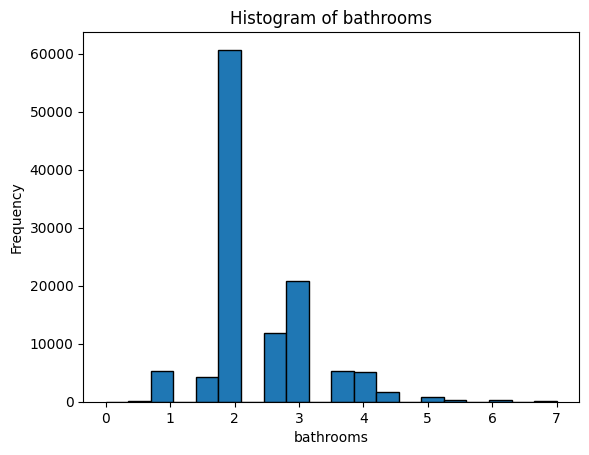

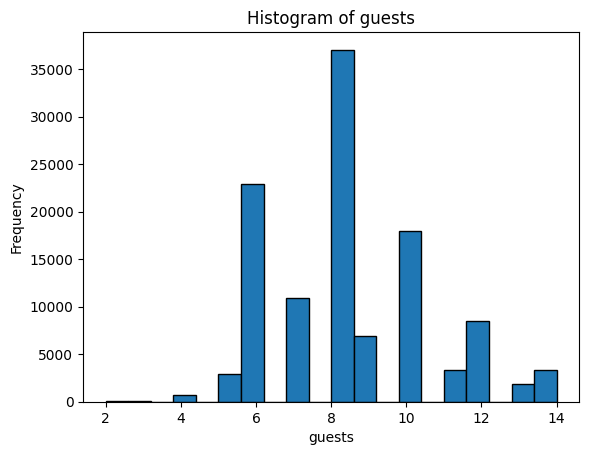

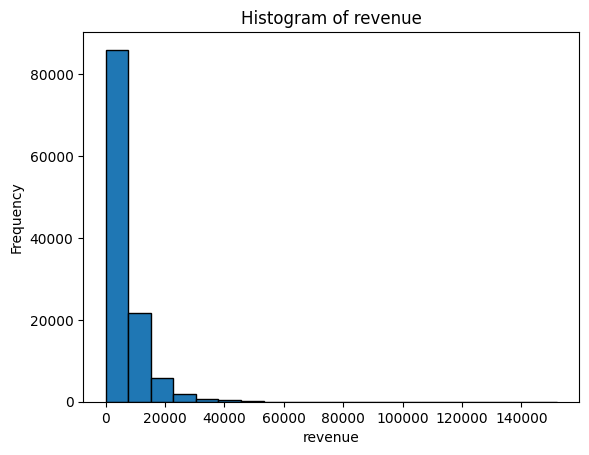

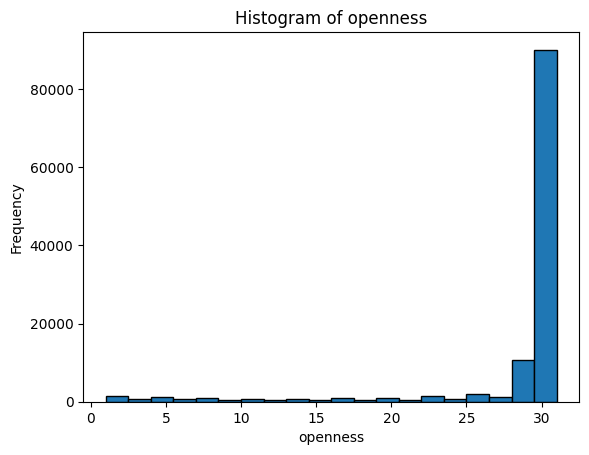

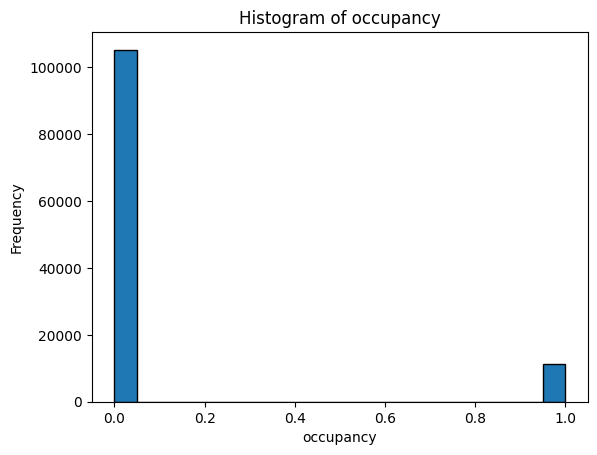

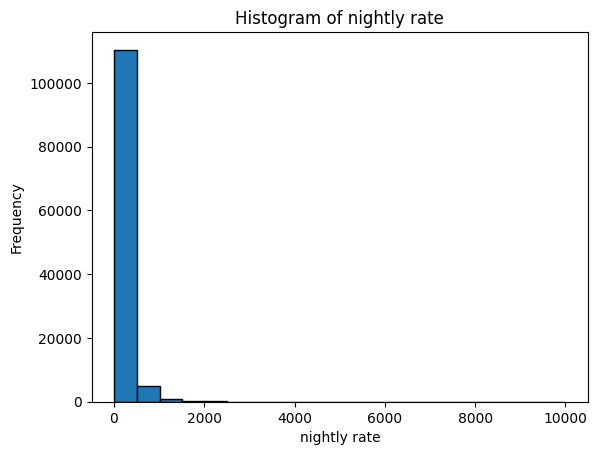

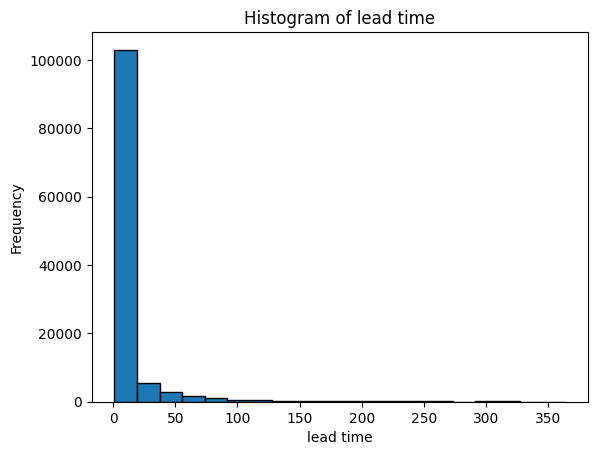

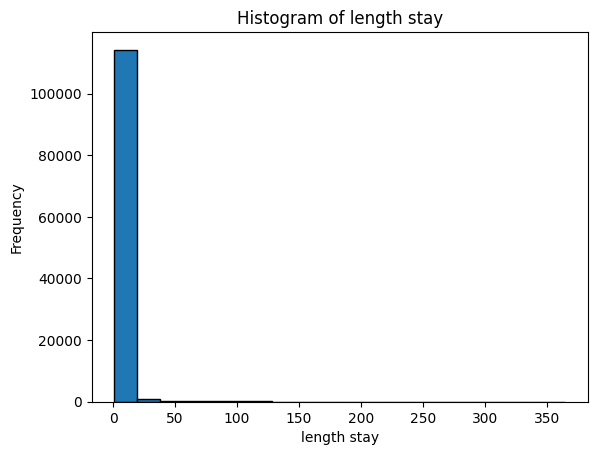

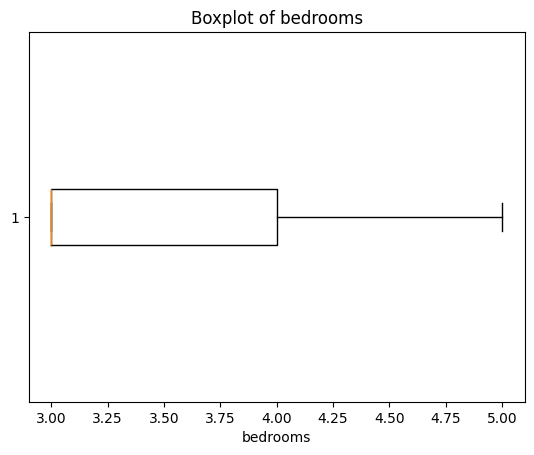

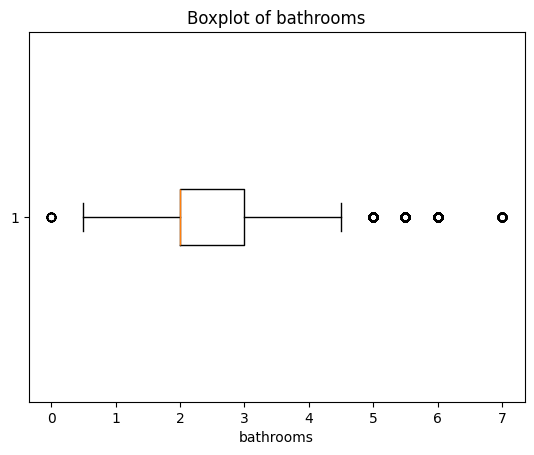

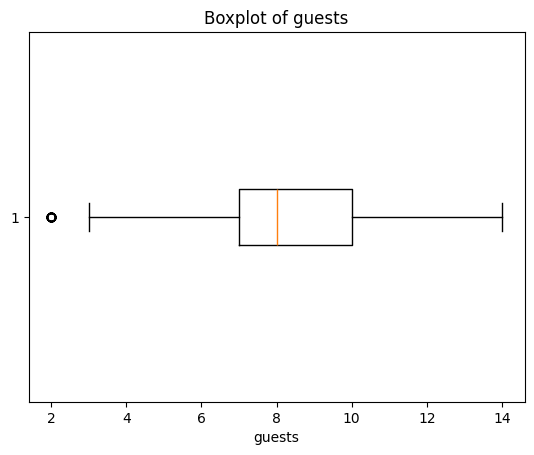

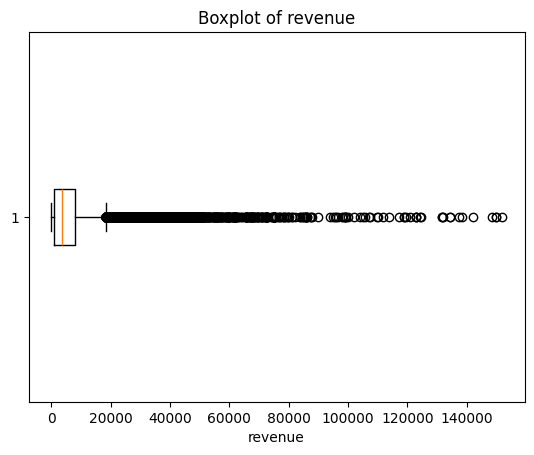

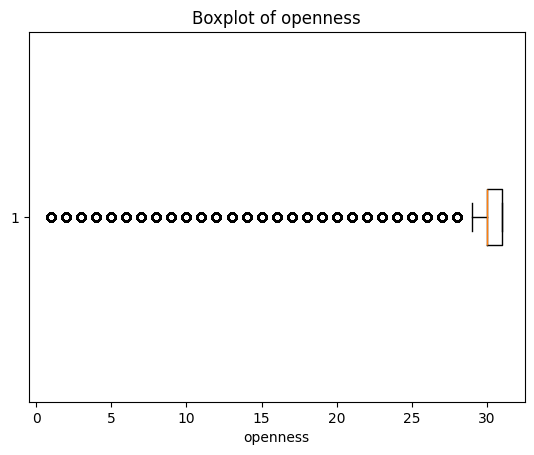

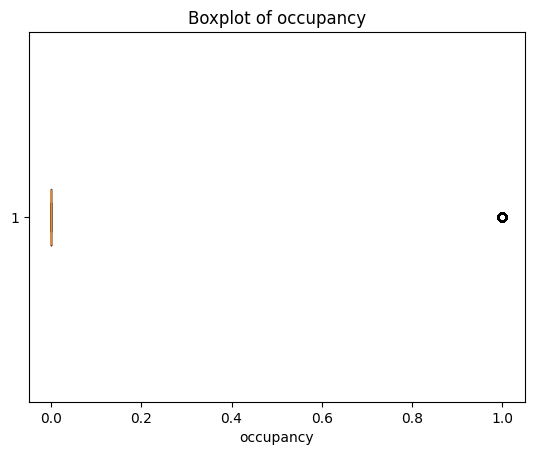

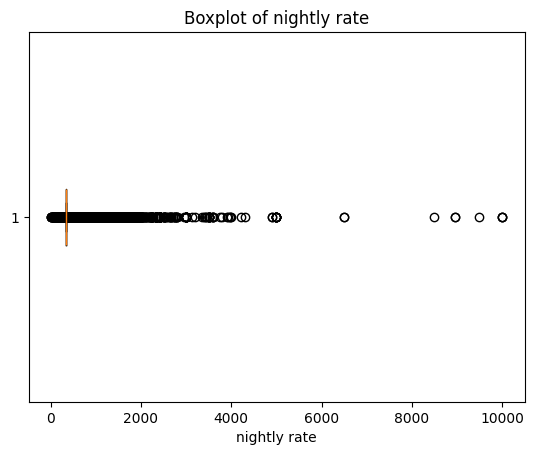

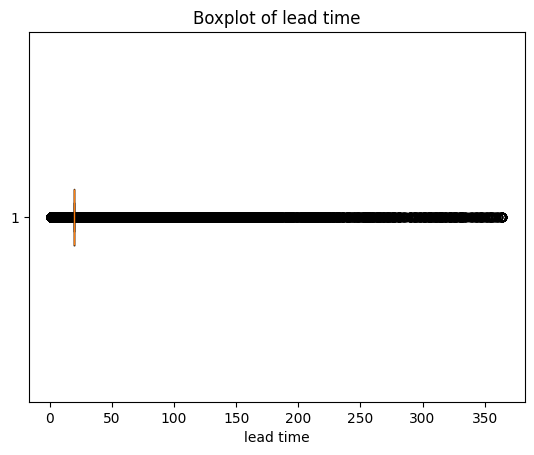

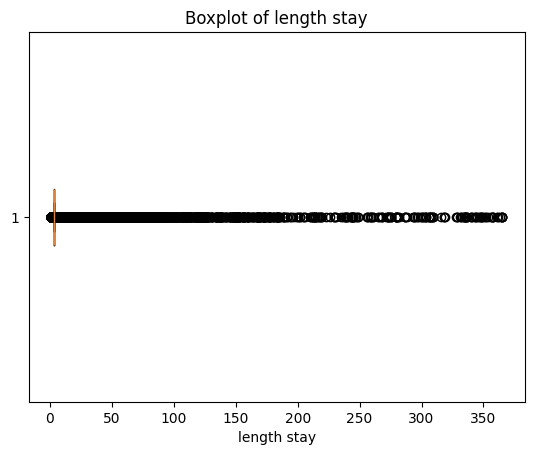

Correlation Matrix:
              bedrooms  bathrooms    guests   revenue  openness  occupancy  \
bedrooms      1.000000   0.590543  0.487851  0.229607 -0.007092  -0.025368   
bathrooms     0.590543   1.000000  0.453278  0.263906 -0.013355  -0.017465   
guests        0.487851   0.453278  1.000000  0.163813 -0.005666  -0.019844   
revenue       0.229607   0.263906  0.163813  1.000000  0.192850   0.298008   
openness     -0.007092  -0.013355 -0.005666  0.192850  1.000000  -0.025316   
occupancy    -0.025368  -0.017465 -0.019844  0.298008 -0.025316   1.000000   
nightly rate  0.167739   0.180131  0.115142  0.246098 -0.017708   0.017740   
lead time     0.047562   0.046581  0.045257  0.057945 -0.006957   0.154100   
length stay  -0.010304  -0.008395 -0.009993  0.072717  0.007538   0.206963   

              nightly rate  lead time  length stay  
bedrooms          0.167739   0.047562    -0.010304  
bathrooms         0.180131   0.046581    -0.008395  
guests            0.115142   0.045257   

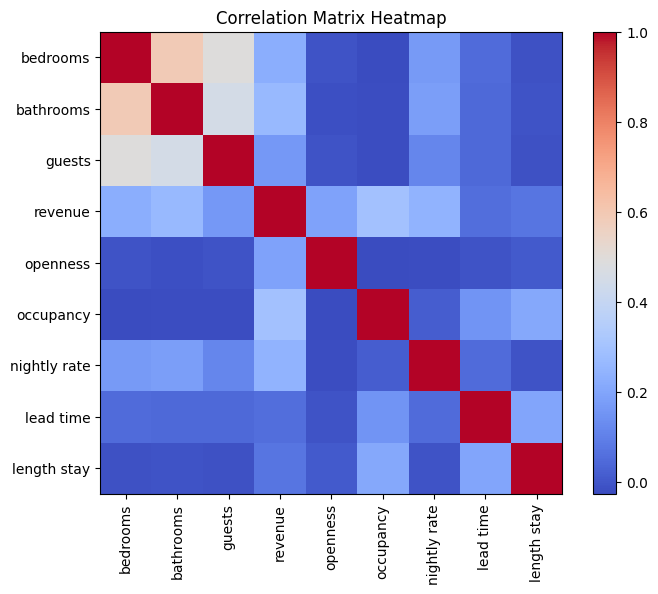

Categorical columns to encode: ['month', 'zipcode', 'city', 'host_type']
Final DataFrame shape after encoding: (116619, 52)
   bedrooms  bathrooms    guests   revenue  openness  occupancy  nightly rate  \
0 -0.633541  -0.520731  0.743016 -0.277414  0.867621        0.0           0.0   
1 -0.633541  -0.520731  0.743016  1.650115  0.867621        0.0           0.0   
2 -0.633541  -0.520731  0.743016  1.564868 -0.165983        0.0           0.0   
3 -0.633541  -0.520731  0.743016  1.650115  0.867621        0.0           0.0   
4 -0.633541  -0.520731  0.743016 -0.907295 -1.199587        0.0           0.0   

   lead time  length stay  month_2020-10  ...  month_2022-8  month_2022-9  \
0        0.0          0.0          False  ...         False         False   
1        0.0          0.0           True  ...         False         False   
2        0.0          0.0          False  ...         False         False   
3        0.0          0.0          False  ...         False         False   
4   

In [10]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# ----------------------------------------------------------------
# Assume df_clean is your cleaned DataFrame from previous steps.
# Create a working copy:
df = df_clean.copy()

# Drop the identifier column if present (it won't help in modeling)
if 'unified_id' in df.columns:
    df = df.drop(columns=['unified_id'])
elif '\ufeffunified_id' in df.columns:
    df = df.drop(columns=['\ufeffunified_id'])

# Define the numeric columns (as already determined)
numeric_cols = ['bedrooms', 'bathrooms', 'guests', 'revenue',
                'openness', 'occupancy', 'nightly rate', 'lead time', 'length stay']

# --------------------------
# 1. Exploratory Data Analysis (EDA)
# --------------------------

# Summary statistics for numeric variables
print("Summary Statistics for Numeric Variables:")
print(df[numeric_cols].describe())

# Plot histograms (one per numeric column)
for col in numeric_cols:
    plt.figure()
    plt.hist(df[col].dropna(), bins=20, edgecolor='k')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# Plot boxplots (one per numeric column) for outlier detection
for col in numeric_cols:
    plt.figure()
    plt.boxplot(df[col].dropna(), vert=False)
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()

# Compute and display the correlation matrix
corr_matrix = df[numeric_cols].corr()
print("Correlation Matrix:")
print(corr_matrix)

# Plot a heatmap of the correlation matrix using matplotlib
plt.figure(figsize=(8, 6))
plt.imshow(corr_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(range(len(numeric_cols)), numeric_cols, rotation=90)
plt.yticks(range(len(numeric_cols)), numeric_cols)
plt.title("Correlation Matrix Heatmap")
plt.show()

# --------------------------
# 2. Outlier Handling: Cap extreme values using the IQR method
# --------------------------
def cap_outliers(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Cap values below lower_bound and above upper_bound
    data[col] = np.where(data[col] < lower_bound, lower_bound, data[col])
    data[col] = np.where(data[col] > upper_bound, upper_bound, data[col])

# Apply outlier capping to all numeric columns
for col in numeric_cols:
    cap_outliers(df, col)

# --------------------------
# 3. Data Normalization/Standardization
# --------------------------
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# --------------------------
# 4. Encoding Categorical Variables
# --------------------------
# Identify potential categorical columns (those not in numeric_cols)
categorical_cols = [col for col in df.columns if col not in numeric_cols]
print("Categorical columns to encode:", categorical_cols)

# One-hot encode the categorical columns
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Check final DataFrame structure after encoding
print("Final DataFrame shape after encoding:", df_encoded.shape)
print(df_encoded.head())

# --------------------------
# 5. Splitting the Dataset
# --------------------------
# Assume 'revenue' is the target variable
X = df_encoded.drop(columns=['revenue'])
y = df_encoded['revenue']

# Split data: first separate out 70% for training and 30% for temporary testing/validation.
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=42)

# Then split the temporary set equally into validation and test sets (15% each of the original data)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42)

print("Train set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)
print("Test set shape:", X_test.shape, y_test.shape)


In [11]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Assume df_clean is your cleaned DataFrame from earlier steps.
# Create a working copy:
df = df_clean.copy()

# --------------------------
# 1. Drop Unnecessary Columns
# --------------------------
# Remove the identifier column if present
if '\ufeffunified_id' in df.columns:
    df = df.drop(columns=['\ufeffunified_id'])
elif 'unified_id' in df.columns:
    df = df.drop(columns=['unified_id'])

# --------------------------
# 2. Define Numeric and Categorical Columns
# --------------------------
numeric_cols = ['bedrooms', 'bathrooms', 'guests', 'revenue',
                'openness', 'occupancy', 'nightly rate', 'lead time', 'length stay']
# Categorical columns: those not in numeric_cols (e.g., month, zipcode, city, host_type)
categorical_cols = [col for col in df.columns if col not in numeric_cols]
print("Categorical columns to encode:", categorical_cols)

# --------------------------
# 3. Outlier Handling
# --------------------------
def cap_outliers(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Cap the values outside the bounds
    data[col] = data[col].clip(lower=lower_bound, upper=upper_bound)

# Apply outlier capping to each numeric column
for col in numeric_cols:
    cap_outliers(df, col)

# --------------------------
# 4. Data Normalization/Standardization
# --------------------------
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# --------------------------
# 5. Encode Categorical Variables
# --------------------------
# One-hot encode categorical columns, dropping the first category to avoid multicollinearity
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
print("DataFrame shape after encoding:", df.shape)

# --------------------------
# 6. Split Dataset into Features and Target, then into Train, Validation, and Test Sets
# --------------------------
# Assuming 'revenue' is the target variable
X = df.drop(columns=['revenue'])
y = df['revenue']

# Split 70% training, 30% temporary (which will be further split into validation and test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=42)

# Split the temporary set equally into validation and test sets (15% each of original data)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42)

# Display the shapes of the resulting splits
print("Train set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)
print("Test set shape:", X_test.shape, y_test.shape)


Categorical columns to encode: ['month', 'zipcode', 'city', 'host_type']
DataFrame shape after encoding: (116619, 52)
Train set shape: (81633, 51) (81633,)
Validation set shape: (17493, 51) (17493,)
Test set shape: (17493, 51) (17493,)


In [13]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

# --------------------------
# Simplified Hyperparameter Tuning
# --------------------------
# Use only the training set (X_train, y_train) for tuning to reduce processing time.
# Define a small parameter grid
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10],
    'min_samples_split': [2]
}

# Initialize the RandomForestRegressor
rf = RandomForestRegressor(random_state=42)

# Set up GridSearchCV with 2-fold cross-validation for speed
grid_search = GridSearchCV(estimator=rf,
                           param_grid=param_grid,
                           cv=2,
                           scoring='neg_mean_squared_error',
                           n_jobs=-1,
                           verbose=1)

# Fit the grid search on the training set
grid_search.fit(X_train, y_train)

# Output the best hyperparameters and training MSE
print("Best parameters:", grid_search.best_params_)
print("Best training MSE:", -grid_search.best_score_)

# --------------------------
# Evaluate the Best Model on the Test Set
# --------------------------
best_model = grid_search.best_estimator_
y_test_pred = best_model.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)
print("Test MSE:", test_mse)
print("Test R2:", test_r2)


Fitting 2 folds for each of 4 candidates, totalling 8 fits
Best parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
Best training MSE: 0.7567608458967954
Test MSE: 0.7680315814754998
Test R2: 0.2274360119214236


Test Mean Squared Error (MSE): 0.7680315814754998
Test R² Score: 0.2274360119214236
Test Mean Absolute Error (MAE): 0.6675273345780253


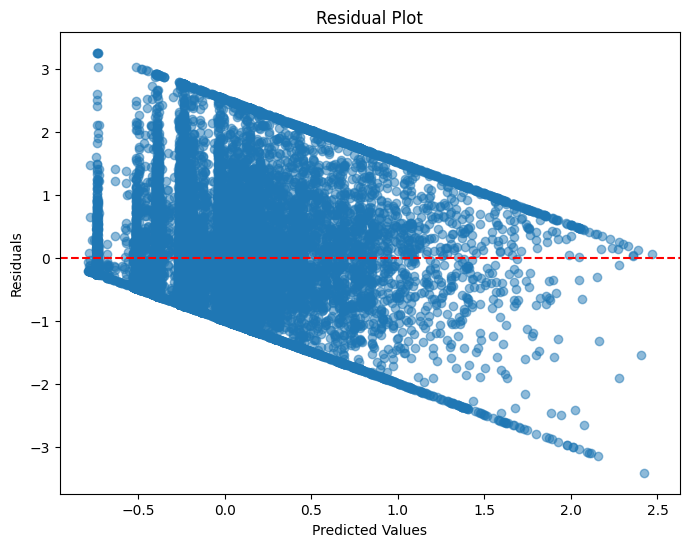

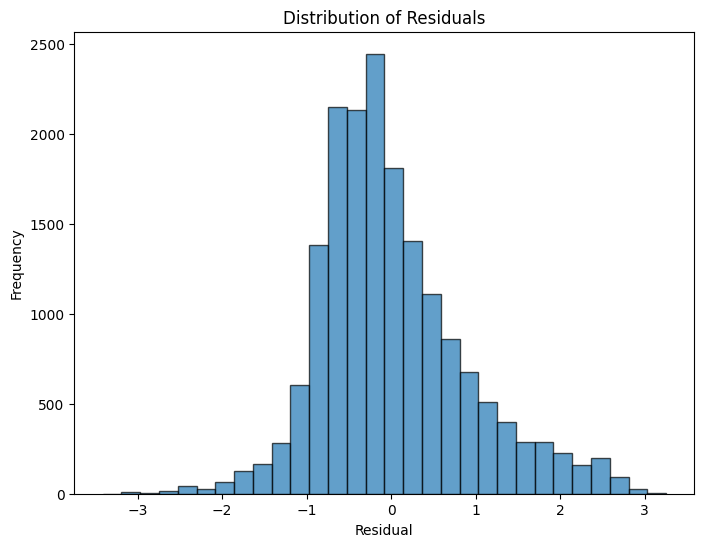

In [14]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Evaluate the model on the test set using the best_model from earlier
y_test_pred = best_model.predict(X_test)

# Calculate evaluation metrics
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

print("Test Mean Squared Error (MSE):", test_mse)
print("Test R² Score:", test_r2)
print("Test Mean Absolute Error (MAE):", test_mae)

# ---------------------------
# Visualizations: Residual Analysis
# ---------------------------
# Calculate residuals
residuals = y_test - y_test_pred

# Residual scatter plot: predicted vs residuals
plt.figure(figsize=(8,6))
plt.scatter(y_test_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

# Histogram of residuals
plt.figure(figsize=(8,6))
plt.hist(residuals, bins=30, edgecolor='k', alpha=0.7)
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals")
plt.show()


In [20]:
import pickle

# Save the trained model (e.g., best_model from previous steps)
with open('best_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)

print("Model saved as 'best_model.pkl'.")

from google.colab import files

# Download the file best_model.pkl to your local machine
files.download('best_model.pkl')



Model saved as 'best_model.pkl'.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>